# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction-aux-algorithmes-de-bandit-(UCB1,-Thompson-Sampling)" data-toc-modified-id="Introduction-aux-algorithmes-de-bandit-(UCB1,-Thompson-Sampling)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction aux <em>algorithmes de bandit</em> (UCB1, Thompson Sampling)</a></div><div class="lev2 toc-item"><a href="#Problèmes-de-bandit" data-toc-modified-id="Problèmes-de-bandit-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problèmes de bandit</a></div><div class="lev2 toc-item"><a href="#Simulation-de-problèmes-de-bandit" data-toc-modified-id="Simulation-de-problèmes-de-bandit-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Simulation de problèmes de bandit</a></div><div class="lev2 toc-item"><a href="#Bras-stochastiques,-de-Bernoulli" data-toc-modified-id="Bras-stochastiques,-de-Bernoulli-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Bras stochastiques, de Bernoulli</a></div><div class="lev2 toc-item"><a href="#Présentation-des-algorithmes-de-bandit" data-toc-modified-id="Présentation-des-algorithmes-de-bandit-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Présentation des algorithmes de bandit</a></div><div class="lev2 toc-item"><a href="#Deux-algorithmes-naïfs" data-toc-modified-id="Deux-algorithmes-naïfs-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Deux algorithmes naïfs</a></div><div class="lev3 toc-item"><a href="#ChoixUniforme" data-toc-modified-id="ChoixUniforme-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span><code>ChoixUniforme</code></a></div><div class="lev3 toc-item"><a href="#MoyenneEmpirique" data-toc-modified-id="MoyenneEmpirique-152"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span><code>MoyenneEmpirique</code></a></div><div class="lev2 toc-item"><a href="#Approche-fréquentiste,-UCB1,-&quot;Upper-Confidence-Bound&quot;" data-toc-modified-id="Approche-fréquentiste,-UCB1,-&quot;Upper-Confidence-Bound&quot;-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Approche fréquentiste, UCB1, "Upper Confidence Bound"</a></div><div class="lev2 toc-item"><a href="#Approche-bayésienne,-Thompson-Sampling" data-toc-modified-id="Approche-bayésienne,-Thompson-Sampling-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Approche bayésienne, Thompson Sampling</a></div><div class="lev2 toc-item"><a href="#Exemples-de-simulations" data-toc-modified-id="Exemples-de-simulations-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Exemples de simulations</a></div><div class="lev3 toc-item"><a href="#Fonctions-pour-l'affichage" data-toc-modified-id="Fonctions-pour-l'affichage-181"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Fonctions pour l'affichage</a></div><div class="lev3 toc-item"><a href="#Premier-problème,-à-3-bras" data-toc-modified-id="Premier-problème,-à-3-bras-182"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>Premier problème, à 3 bras</a></div><div class="lev3 toc-item"><a href="#Second-problème,-à-9-bras" data-toc-modified-id="Second-problème,-à-9-bras-183"><span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>Second problème, à 9 bras</a></div><div class="lev3 toc-item"><a href="#Troisième-problème,-simulé-100-fois" data-toc-modified-id="Troisième-problème,-simulé-100-fois-184"><span class="toc-item-num">1.8.4&nbsp;&nbsp;</span>Troisième problème, simulé 100 fois</a></div><div class="lev3 toc-item"><a href="#Dernier-problème,-simulé-1000-fois" data-toc-modified-id="Dernier-problème,-simulé-1000-fois-185"><span class="toc-item-num">1.8.5&nbsp;&nbsp;</span>Dernier problème, simulé 1000 fois</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Conclusion</a></div>

# Introduction aux *algorithmes de bandit* (UCB1, Thompson Sampling)
Ce petit document est un [notebook Jupyter](https://www.jupyter.org), ayant pour but de présenter le concept de problèmes de bandit, comment les simuler et les résoudre, et deux algorithmes conçus dans ce but.

Je ne vais pas donner beaucoup d'explications mathématiques, je conseille plutôt [ce petit article, datant de 2017, en français, écrit par Émilie Kaufmann](http://chercheurs.lille.inria.fr/ekaufman/Matapli_Kaufmann.pdf).

Je préfère me focaliser sur une implémentation simple, claire et concise de chaque morceau nécessaire à la simulation de problèmes et d'algorithmes de bandit.
J'utilise le [langage de programmation Python](https://www.python.org/).

Dans ce but, j'utilise une approche *objet* : chaque morceau sera une classe, et des *instances* (des *objets*) seront utilisées pour toutes les composantes.

In [30]:
# Dépendances
import numpy as np
import random as rd

In [129]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.4)
from tqdm import tqdm_notebook as tqdm

----
## Problèmes de bandit

FIXME expliquer cette partie.

----
## Simulation de problèmes de bandit

Une simple *fonction* suffira ici, pour initialiser un algorithme, le simuler durant $T$ étapes, et stocker les récompenses et les bras tirés.

Il est important de tout stocker pour ensuite pouvoir afficher différentes statistiques sur l'expérience, permettant d'évaluer l'efficacité des différentes algorithmes.

Je préfère donner directement cette fonction afin de fixer les *signatures* des différentes classes qu'on va écrire ensuite :

- Les *bras* ont besoin d'une seule méthode, `tire()` qui donne $r_k(t) \sim \nu_k$ à l'instant $t$ pour la distribution $\nu_k$ du $k^{\text{ième}}$ bras, noté `r_k_t`.
- Les *algorithmes* ont besoin de trois méthodes :
    + `commence()` pour initialiser l'algorithme, une fois,
    + `A_t = choix()` pour choisir un bras, à chaque instant $t$, noté $A(t) \in \{1,\dots,K\}$,
    + `recompense(A_t, r_k_t)` pour donner la récompense `r_k_t` tirée du bras `A_t`.

In [2]:
def simulation(bras, algorithme, horizon):
    """ Simule l'algorithme donné sur ces bras, durant horizon étapes."""
    choix, recompenses = np.zeros(horizon), np.zeros(horizon)
    # 1. Initialise l'algorithme
    algorithme.commence()
    # 2. Boucle en temps, pour t = 0 à horizon - 1
    for t in range(horizon):
        # 2.a. L'algorithme choisi son bras à essayer
        A_t = algorithme.choix()
        # 2.b. Le bras k donne une récompense
        r_k_t = bras[A_t].tire()
        # 2.c. La récompense est donnée à l'algorithme
        algorithme.recompense(A_t, r_k_t)
        # 2.d. On stocke les deux
        choix[t] = A_t
        recompenses[t] = r_k_t
    # 3. On termine en renvoyant ces deux vecteurs
    return recompenses, choix

----
## Bras stochastiques, de Bernoulli

Les récompenses de tels bras, notées $r_k(t)$ pour le bras $k$ à l'instant $t$, sont tirées de façons identiquement distribuées et indépendantes, selon une loi de Bernoulli :
$$ \forall t\in\mathbb{N}, \forall k\in\{1,\dots,K\}, r_k(t) \sim \mathrm{B}(\mu_k). $$

In [3]:
class Bernoulli():
    """ Bras distribués selon une loi de Bernoulli."""

    def __init__(self, probabilite):
        assert 0 <= probabilite <= 1, "Erreur, probabilite doit être entre 0 et 1 pour un bras de Bernoulli."
        self.probabilite = probabilite

    def tire(self):
        """ Tire une récompense aléatoire."""
        return float(rd.random() <= self.probabilite)

Par exemple, on peut considérer le problème à trois bras ($K = 3$), caractérisé par ces paramètres $\boldsymbol{\mu} = [\mu_1,\dots,\mu_K] = [0.1, 0.5, 0.9]$ :

In [4]:
mus = [ 0.1, 0.5, 0.9 ]
bras = [ Bernoulli(mu) for mu in mus ]

On peut prendre 10 échantillons de chaque bras, et vérifier leurs moyennes :

In [5]:
rd.seed(10000)
T = 10
exemples_echantillons = [ [ bras_k.tire() for _ in range(T) ] for bras_k in bras ]
exemples_echantillons

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]

In [6]:
np.mean(exemples_echantillons, axis=1)

array([ 0.1,  0.5,  0.9])

> C'est assez proche de $\boldsymbol{\mu} = [\mu_1,\dots,\mu_K] = [0.1, 0.5, 0.9]$... Non ?

----
## Présentation des algorithmes de bandit
Comme on l'a dit plus haut, les *algorithmes* ont besoin de trois méthodes :

- `commence()` pour initialiser l'algorithme, une fois. Généralement, il s'agit de remettre à zero les vecteurs de mémoires internes de l'algorithme, et de mettre $t = 0$.
- `A_t = choix()` pour choisir un bras, à chaque instant $t$, noté $A(t) \in \{1,\dots,K\}$. C'est la partie "intelligente" qui doit être conçue avec soin.
- `recompense(A_t, r_k_t)` pour donner la récompense `r_k_t` tirée du bras `A_t`. Souvent, il suffit de mettre à jour les deux ou trois vecteurs internes.

En fait, il faut aussi une méthode pour *créer* l'instance de la classe, i.e., une méthode `__init__(K)`, qui demande de simplement connaître $K$, le nombre de bras.

> Bien-sûr, les algorithmes ne doivent pas connaître $\boldsymbol{\mu} = [\mu_1,\dots,\mu_K]$ les paramètres du problème... Sinon l'apprentissage n'a aucun intérêt : il suffit de viser $k^* = \arg\max_k \mu_k$...

----
## Deux algorithmes naïfs
On va commencer par donner deux exemples naïfs :

1. Un algorithme "stupide" qui choisi un bras de façon complètement uniforme, $A^{1}(t) \sim U(1,\dots,K), \forall t$, à chaque instant $t \in \mathbb{N}$, via la classe `ChoixUniforme`.

2. Un algorithme moins stupide, mais assez naïf, qui utilise un *estimateur empirique* $\widehat{\mu_k}(t) = \frac{X_k(t)}{N_k(t)}$ de la *moyenne* de chaque bras, et tire $A^{2}(t) \in \arg\max_k \widehat{\mu_k}(t)$ à chaque instant $t \in \mathbb{N}$. Ici, $X_k(t) = \sum_{\tau=0}^{t} \mathbb{1}(A(\tau) = k) r_k(\tau)$ compte les récompenses *accumulées* en tirant le bras $k$, sur les instants $t = 0,\dots,\tau$. Et $N_k(t) = \sum_{\tau=0}^{t} \mathbb{1}(A(\tau) = k)$ compte le nombre de sélections de ce bras $k$. Via la classe `MoyenneEmpirique`.

### `ChoixUniforme`

In [7]:
class ChoixUniforme(object):
    """Algorithme stupide, choix uniforme."""
    
    def __init__(self, K):
        """Crée l'instance de l'algorithme."""
        self.K = K
    
    def commence(self):
        """Initialise l'algorithme : rien à faire ici."""
        pass
    
    def choix(self):
        """Choix uniforme d'un indice A(t) ~ U(1...K)."""
        return rd.randint(0, self.K - 1)
        
    def recompense(self, k, r):
        """Donne une récompense r tirée sur le bras k à l'algorithme : rien à faire ici."""
        pass

### `MoyenneEmpirique`
Voilà qui donne une bonne idée de la structure (*"API"*) que vont devoir suivre les différentes algorithmes.

L'algorithme suivant est un peu plus complexe.

In [8]:
class MoyenneEmpirique(object):
    """Algorithme naïf, qui utilise la moyenne empirique."""
    
    def __init__(self, K):
        """Crée l'instance de l'algorithme."""
        self.K = K
        # Il nous faut de la mémoire interne
        self.recompenses = np.zeros(K)  # X_k(t) pour chaque k
        self.tirages = np.zeros(K)      # N_k(t) pour chaque k
        self.t = 0                      # Temps t interne
    
    def commence(self):
        """Initialise l'algorithme : remet à zeros chaque X_k et N_k, et t = 0."""
        self.recompenses.fill(0)
        self.tirages.fill(0)
        self.t = 0
    
    def choix(self):
        """Si on a vu tous les bras, on prend celui de moyenne empirique la plus grande."""
        # 1er cas : il y a encore des bras qu'on a jamais vu
        if np.min(self.tirages) == 0:
            k = np.min(np.where(self.tirages == 0)[0])
        # 2nd cas : tous les bras ont été essayé
        else:
            # Notez qu'on aurait pu ne stocker que ce vecteur moyennes_empiriques
            moyennes_empiriques = self.recompenses / self.tirages
            k = np.argmax(moyennes_empiriques)
        self.t += 1      # Inutile ici
        return k
        
    def recompense(self, k, r):
        """Donne une récompense r tirée sur le bras k à l'algorithme : met à jour les deux vecteurs internes."""
        self.recompenses[k] += r
        self.tirages[k] += 1

----
## Approche fréquentiste, UCB1, "Upper Confidence Bound"

Il s'agit d'une amélioration de l'algorithme précédent, où on utilise un autre *indice*.

Au lieu d'utiliser la moyenne empirique $g_k(t) = \widehat{\mu_k}(t) = \frac{X_k(t)}{N_k(t)}$ et $A(t) = \arg\max_k  g_k(t)$, on utilise une borne supérieure d'un intervalle de confiance autour de cette moyenne :
$$g'_k(t) = \widehat{\mu_k}(t) + \sqrt{\alpha \frac{\log t}{N_k(t)}}.$$
Et cet *indice* est toujours utilisé pour décider le bras à essayer à chaque instant :
$$A^{\mathrm{UCB}1}(t) = \arg\max_k g'_k(t).$$

Il faut une constante $\alpha \geq 0$, qu'on choisira $\alpha \geq \frac12$ pour avoir des performances raisonnables. $\alpha$ contrôle le compromis entre *exploitation* et *exploration*, et ne doit pas être trop grand. $\alpha = 1$ est un bon choix par défaut.

> On va gagner du temps en *héritant* de la classe `MoyenneEmpirique` précédente. Ça permet de ne pas réécrire les méthodes qui sont déjà bien écrites.

In [16]:
class UCB1(MoyenneEmpirique):
    """Algorithme UCB1."""
    
    def __init__(self, K, alpha=1):
        """Crée l'instance de l'algorithme. Par défaut, alpha=1."""
        super(UCB1, self).__init__(K)  # On laisse la classe mère faire le travaille
        assert alpha >= 0, "Erreur : alpha doit etre >= 0."
        self.alpha = alpha
    
    def choix(self):
        """Si on a vu tous les bras, on prend celui de moyenne empirique la plus grande."""
        self.t += 1      # Nécessaire ici
        # 1er cas : il y a encore des bras qu'on a jamais vu
        if np.min(self.tirages) == 0:
            k = np.min(np.where(self.tirages == 0)[0])
        # 2nd cas : tous les bras ont été essayé
        else:
            # Notez qu'on aurait pu ne stocker que ce vecteur moyennes_empiriques
            moyennes_empiriques = self.recompenses / self.tirages
            ucb = np.sqrt(self.alpha * np.log(self.t) / np.log(self.tirages))
            indices = moyennes_empiriques + ucb
            k = np.argmax(indices)
        return k

----
## Approche bayésienne, Thompson Sampling

[Ce petit article](http://chercheurs.lille.inria.fr/ekaufman/Matapli_Kaufmann.pdf) explique très bien l'approche bayésienne.

On a besoin de savoir manipuler des posteriors, qui seront les posteriors conjugués des distributions des bras.

Pour des bras de Bernoulli, le posterior conjugué associé est une loi Beta, notée $\mathrm{Beta}(\alpha,\beta)$ pour deux paramètres $\alpha,\beta > 0$.

- Les posteriors sont initialisés à $\mathrm{Beta}(1, 1) = U([0,1])$, c'est-à-dire qu'on met un a priori uniforme sur les $\mu_k$, comme on ne connaît que $\mu_k \in [0,1]$.
- Comme les *observations* sont binaires, $r_k(t) \in \{0,1\}$, les paramètres $\alpha$,$\beta$ restent entiers.

In [22]:
from numpy.random import beta

class Beta():
    """Posteriors d'expériences de Bernoulli."""

    def __init__(self):
        self.N = [1, 1]

    def reinitialise(self):
        self.N = [1, 1]

    def echantillon(self):
        """Un échantillon aléatoire de ce posterior Beta."""
        return beta(self.N[1], self.N[0])

    def observe(self, obs):
        """Ajoute une nouvelle observation. Si 'obs'=1, augmente alpha, sinon si 'obs'=0, augmente beta."""
        self.N[int(obs)] += 1

Dès qu'on sait manipuler ces postériors Beta, on peut implémenter rapidement le dernier algorithme, Thompson Sampling.

Les paramètres du posterior sur $\mu_k$, i.e., $\alpha_k(t)$,$\beta_k(t)$ seront mis à jour à chaque étape pour compter le nombre d'observations réussies et échouées :
$$ \alpha_k(t) = 1 + X_k(t) \\ \beta_k(t) = 1 + N_k(t) - X_k(t).$$

La moyenne empirique estimant $\mu_k$ sera, à l'instant $t$,
$$ \widetilde{\mu_k}(t) = \frac{\alpha_k(t)}{\alpha_k(t) + \beta_k(t)} = \frac{1 + X_k(t)}{2 + N_k(t)} \simeq \frac{X_k(t)}{N_k(t)}.$$

La différence avec UCB1 est que la prise de décision de Thompson Sampling se fait sur un indice, tiré aléatoirement selon les posteriors.
C'est une *politique d'indice randomisée*.

D'un point de vue bayésien, un *modèle* est tiré selon les posteriors, puis on joue selon le meilleur modèle :
$$ g''_k(t) \sim \mathrm{Beta}(\alpha_k(t), \beta_k(t)) \\ A^{\mathrm{TS}}(t) = \arg\max_k g''_k(t). $$

In [23]:
class ThompsonSampling(MoyenneEmpirique):
    """Algorithme Thompson Sampling."""
    
    def __init__(self, K, posterior=Beta):
        """Crée l'instance de l'algorithme. Par défaut, alpha=1."""
        self.K = K
        # On créé K posteriors
        self.posteriors = [posterior() for k in range(K)]
    
    def commence(self):
        """Réinitialise les K posteriors."""
        for posterior in self.posteriors:
            posterior.reinitialise()
    
    def choix(self):
        """On tire K modèles depuis les posteriors, et on joue dans le meilleur."""
        moyennes_estimees = [posterior.echantillon() for posterior in self.posteriors]
        k = np.argmax(moyennes_estimees)
        return k

    def recompense(self, k, r):
        """Observe cette récompense r sur le bras k en mettant à jour le kième posterior."""
        self.posteriors[k].observe(r)

----
## Exemples de simulations

On va comparer, sur deux problèmes, les 4 algorithmes définis plus haut.

Les problèmes sont caractérisés par les moyennes des bras de Bernoulli, $\boldsymbol{\mu} = [\mu_1,\dots,\mu_K]$, et on les suppose ordonnées par ordre décroissant : $\mu_1 > \mu_2 \ge \dots \ge \mu_K$.

On affichera plusieurs choses, dans des graphiques au cours du temps $t = 0, \dots, T$ pour un horizon $T = 1000$ ou $T = 5000$ étapes :

1. leurs *taux de sélection* du meilleur bras $k^*$, (qui sera toujours $\mu_1$ le premier bras), i.e., $N_k(t) / t$ en $\%$, pour chaque algorithme,
2. leurs *récompenses accumulées*, i.e., $R(t) = \sum_{\tau=0}^{t} \sum_{k=1}^{K} X_k(\tau) \mathbb{1}(A(t) = k)$, pour chaque algorithme,
3. les *récompenses moyennes*, i.e., $R(t) / t$, qui devrait converger vers $\mu^* = \mu_{k^*} = \mu_1$,
4. et enfin leurs *regret*. Cette notion est moins triviale, mais pour notre problème simple il se définit comme la perte, en récompenses accumulées, entre la meilleure stratégie (toujours sélectionner le meilleur bras $k^* = 1$) et la performance de l'algorithme :
   $$ \mathcal{R}(t) = \mu^* t - R(t) $$
   On souhaite maximiser $R(t)$, donc minimiser $\mathcal{R}(t)$.
   Les algorithmes "efficaces" ont typiquement un regret *logarithmique*, i.e., $\mathcal{R}(T) = \mathcal{O}(\log T)$ *asymptotiquement*, ce qu'on souhaiterait vérifier.

### Fonctions pour l'affichage

On définit 4 fonctions d'affichage pour ces quantités.

In [140]:
mpl.rcParams['figure.figsize'] = (15, 8)

In [141]:
def affiche_selections(choix, noms, kstar=0):
    plt.figure()
    for i, c in enumerate(choix):
        selection_kstar = 1.0 * (c == kstar)
        selection_moyenne = np.cumsum(selection_kstar) / np.cumsum(np.ones_like(c))
        plt.plot(selection_moyenne, label=noms[i])
    plt.legend()
    plt.xlabel("Temps discret, $t = 1, ..., T = {}$".format(len(choix[0])))
    plt.ylabel("Taux de sélection")
    plt.title("Sélection du meilleur bras #{} pour différents algorithmes".format(1 + kstar))
    plt.show()

In [142]:
def affiche_recompenses(recompenses, noms):
    plt.figure()
    for i, r in enumerate(recompenses):
        recompense_accumulee = np.cumsum(r)
        plt.plot(recompense_accumulee, label=noms[i])
    plt.legend()
    plt.xlabel("Temps discret, $t = 1, ..., T = {}$".format(len(choix[0])))
    plt.ylabel("Récompenses accumulées")
    plt.title("Récompenses accumulées pour différents algorithmes")
    plt.show()

In [143]:
def affiche_recompenses_moyennes(recompenses, noms):
    plt.figure()
    for i, r in enumerate(recompenses):
        recompense_moyenne = np.cumsum(r) / np.cumsum(np.ones_like(r))
        plt.plot(recompense_moyenne, label=noms[i])
    plt.legend()
    plt.xlabel("Temps discret, $t = 1, ..., T = {}$".format(len(choix[0])))
    plt.ylabel(r"Récompenses moyennes $\in [0, 1]$")
    plt.title("Récompenses accumulées pour différents algorithmes")
    plt.show()

In [144]:
def affiche_regret(recompenses, noms, mustar=1):
    plt.figure()
    for i, r in enumerate(recompenses):
        recompense_accumulee = np.cumsum(r)
        regret = mustar * np.cumsum(np.ones_like(r)) - recompense_accumulee
        plt.plot(regret, label=noms[i])
    plt.legend()
    plt.xlabel("Temps discret, $t = 1, ..., T = {}$".format(len(choix[0])))
    plt.ylabel("Regret")
    plt.title("Regret accumulé pour différents algorithmes")
    plt.show()

### Premier problème, à 3 bras
On reprend le problème donné plus haut :

In [96]:
horizon = 1000
mus = [0.9, 0.5, 0.1]
bras = [ Bernoulli(mu) for mu in mus ]
K = len(mus)
kstar = np.argmax(mus)  # = 0

In [97]:
horizon, mus, bras, K, kstar

(1000,
 [0.9, 0.5, 0.1],
 3,
 0)

In [98]:
algorithmes = [ChoixUniforme(K), MoyenneEmpirique(K), UCB1(K, alpha=1), ThompsonSampling(K)]
algorithmes

Pour les légendes, on a besoin des noms des algorithmes :

In [99]:
noms = ["ChoixUniforme", "MoyenneEmpirique", "UCB1(alpha=1)", "ThompsonSampling"]

On peut commencer la simulation, pour chaque algorithme.

In [128]:
%%time
N = len(algorithmes)
recompenses, choix = np.zeros((N, horizon)), np.zeros((N, horizon))

for i, alg in tqdm(enumerate(algorithmes), desc="Algorithmes"):
    rec, ch = simulation(bras, alg, horizon)
    recompenses[i] = rec
    choix[i] = ch

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


CPU times: user 1.23 s, sys: 228 ms, total: 1.46 s
Wall time: 1.24 s


In [102]:
recompenses, choix

(array([[ 1.,  0.,  0., ...,  1.,  1.,  0.],
        [ 1.,  1.,  0., ...,  1.,  0.,  1.],
        [ 1.,  0.,  0., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  0.]]),
 array([[ 2.,  2.,  1., ...,  1.,  0.,  1.],
        [ 0.,  1.,  2., ...,  0.,  0.,  0.],
        [ 0.,  1.,  2., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.]]))

On affiche et vérifie les résultats attendus :

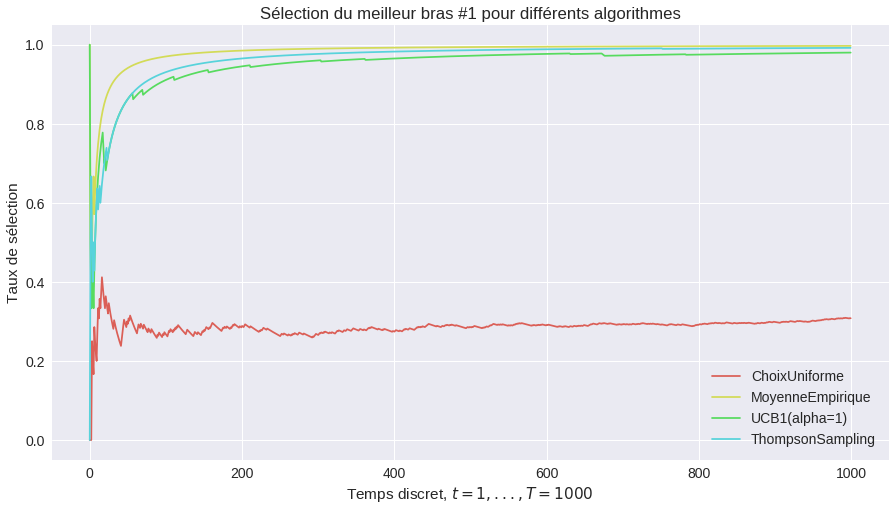

In [103]:
affiche_selections(choix, noms, kstar)

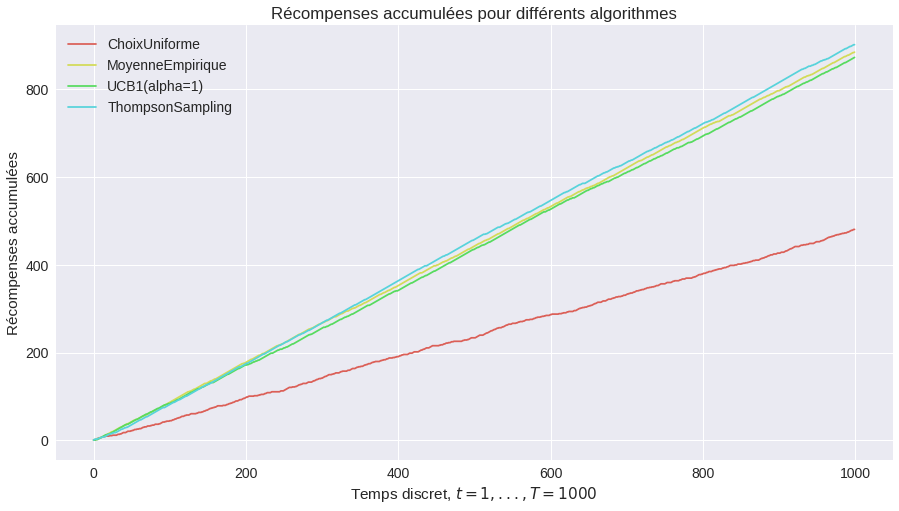

In [104]:
affiche_recompenses(recompenses, noms)

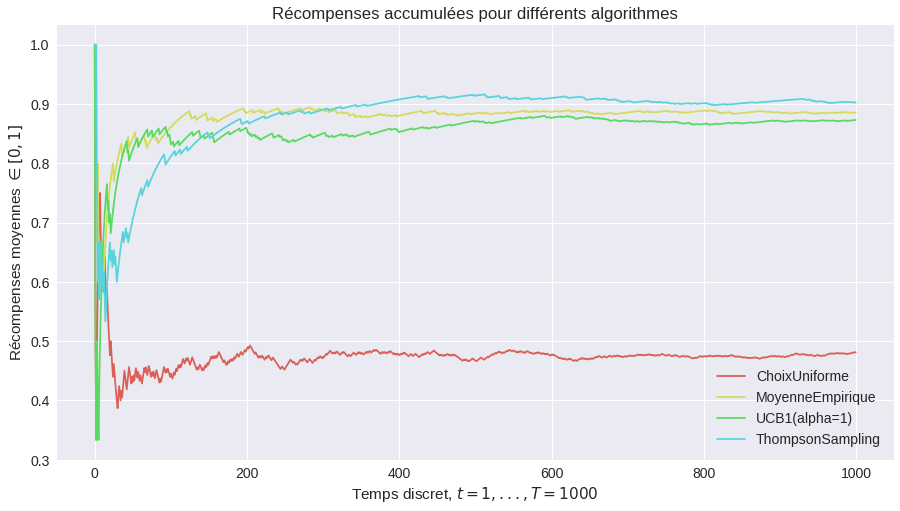

In [105]:
affiche_recompenses_moyennes(recompenses, noms)

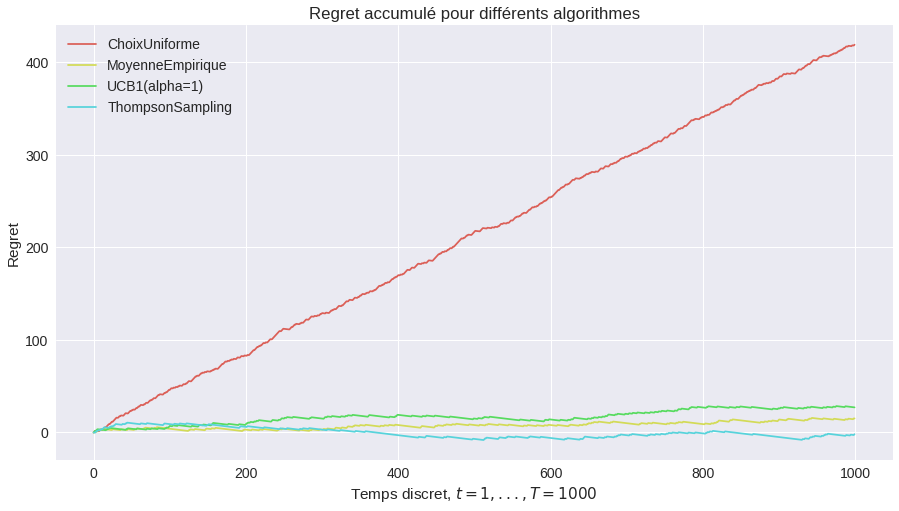

In [106]:
affiche_regret(recompenses, noms, mustar=mus[kstar])

$\implies$ L'algorithme uniforme est, bien évidemment, très inefficace !
Il empêche de visualiser le regret des trois autres algorithmes.

Et sur ce problème simple à trois bras, avec *une seule simulation* (donc une variance immense), difficile de savoir lequel des trois algorithmes est le plus efficace...

### Second problème, à 9 bras

In [107]:
horizon = 5000
mus = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
bras = [ Bernoulli(mu) for mu in mus ]
K = len(mus)
kstar = np.argmax(mus)  # = 0

In [108]:
horizon, mus, bras, K, kstar

(5000,
 [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
 9,
 0)

On va comparer différents choix de $\alpha$ pour l'algorithme UCB : $\alpha = 4, 1, 0.5, 0.1$.

In [109]:
algorithmes = [MoyenneEmpirique(K), UCB1(K, alpha=4), UCB1(K, alpha=1), UCB1(K, alpha=0.5), UCB1(K, alpha=0.1), ThompsonSampling(K)]
algorithmes

Pour les légendes, on a besoin des noms des algorithmes :

In [110]:
noms = ["MoyenneEmpirique", "UCB1(alpha=4)", "UCB1(alpha=1)", "UCB1(alpha=0.5)", "UCB1(alpha=0.1)", "ThompsonSampling"]

On peut commencer la simulation, pour chaque algorithme.

In [127]:
%%time
N = len(algorithmes)
recompenses, choix = np.zeros((N, horizon)), np.zeros((N, horizon))

for i, alg in tqdm(enumerate(algorithmes), desc="Algorithmes"):
    rec, ch = simulation(bras, alg, horizon)
    recompenses[i] = rec
    choix[i] = ch

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


CPU times: user 1.2 s, sys: 188 ms, total: 1.39 s
Wall time: 1.17 s


In [112]:
recompenses, choix

(array([[ 1.,  1.,  0., ...,  1.,  1.,  1.],
        [ 1.,  1.,  0., ...,  1.,  1.,  1.],
        [ 1.,  1.,  0., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  0.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 0.,  1.,  0., ...,  1.,  1.,  1.]]),
 array([[ 0.,  1.,  2., ...,  0.,  0.,  0.],
        [ 0.,  1.,  2., ...,  1.,  1.,  1.],
        [ 0.,  1.,  2., ...,  0.,  0.,  0.],
        [ 0.,  1.,  2., ...,  0.,  0.,  0.],
        [ 0.,  1.,  2., ...,  0.,  0.,  0.],
        [ 6.,  1.,  7., ...,  0.,  0.,  0.]]))

On affiche et vérifie les résultats attendus :

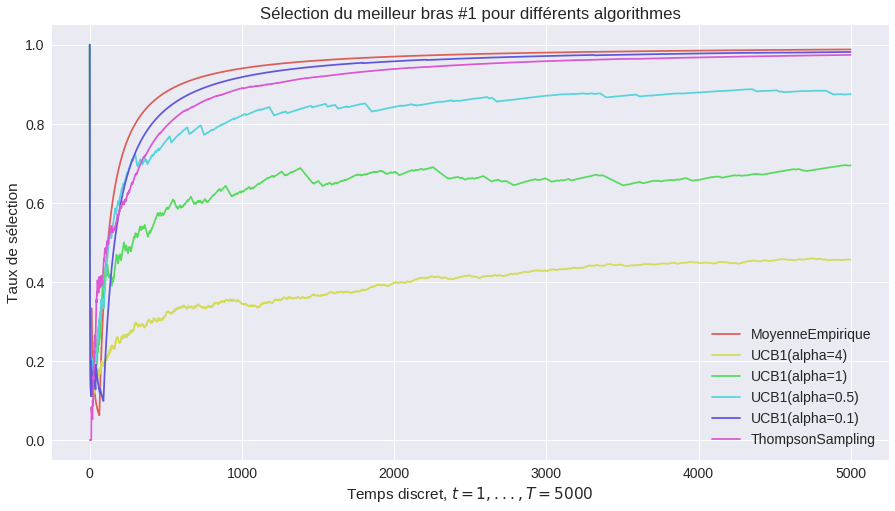

In [113]:
affiche_selections(choix, noms, kstar)

On commence à voir une différence de vitesse de convergence, pour l'identification du meilleur bras.

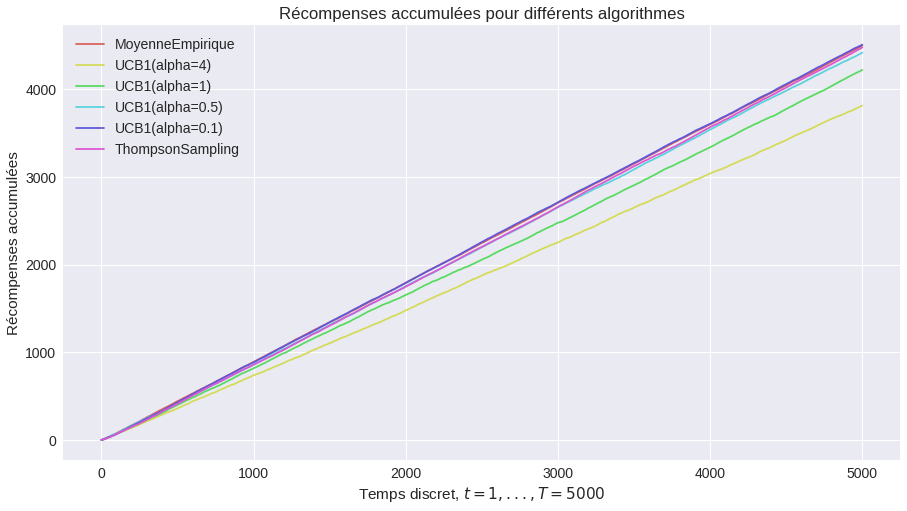

In [114]:
affiche_recompenses(recompenses, noms)

Difficile de différence quel algorithme est le plus efficace, même si clairement les plus grandes valeurs de $\alpha = 4, 1$ pour UCB semblent avoir moins bien fonctionner.

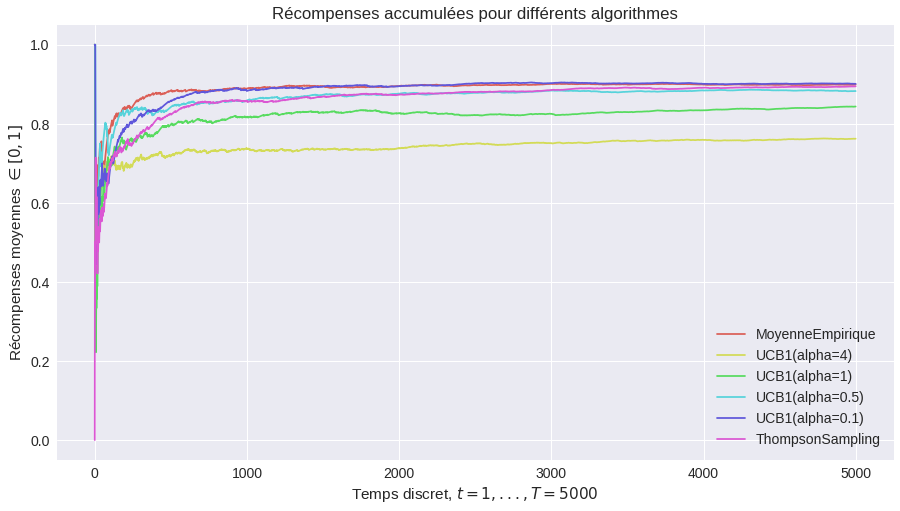

In [116]:
affiche_recompenses_moyennes(recompenses, noms)

En terme de récompenses moyennes au cours du temps, les 4 algorithmes les plus efficaces convergent vers $\mu^* = \mu_1 = 0.9$.

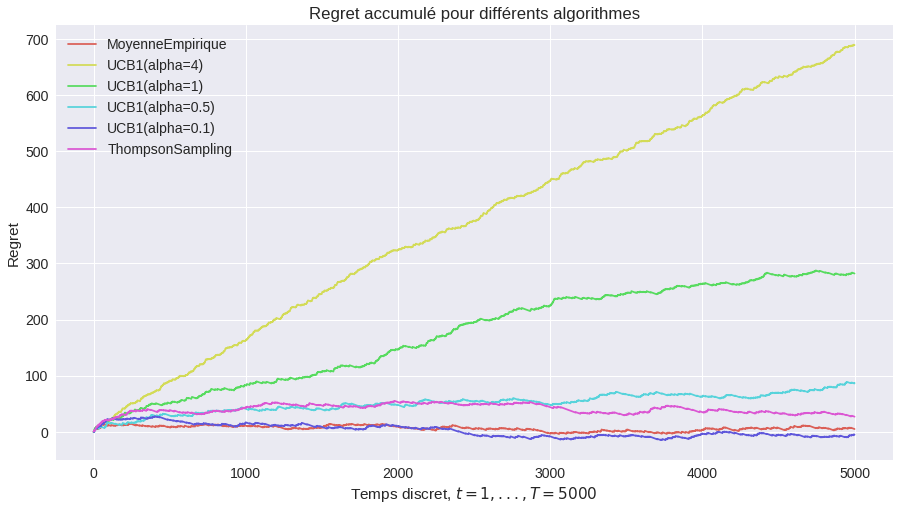

In [117]:
affiche_regret(recompenses, noms, mustar=mus[kstar])

Encore une fois, une seule simulation ne permet pas vraiment de conclure...

### Troisième problème, simulé 100 fois
On s'intéresse au même problème, mais simulé 100 fois et sur un horizon plus long ($T = 10000$).

On s'intéressera ensuite aux statistiques *moyennes* sur ces 100 répétitions pour les graphiques.

In [130]:
horizon = 10000
repetitions = 100
mus = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
bras = [ Bernoulli(mu) for mu in mus ]
K = len(mus)
kstar = np.argmax(mus)  # = 0

In [131]:
horizon, repetitions, mus, bras, K, kstar

(10000,
 100,
 [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
 9,
 0)

On va comparer différents choix de $\alpha$ pour l'algorithme UCB : $\alpha = 4, 1, 0.5, 0.1$.

In [132]:
algorithmes = [MoyenneEmpirique(K), UCB1(K, alpha=4), UCB1(K, alpha=1), UCB1(K, alpha=0.5), UCB1(K, alpha=0.1), ThompsonSampling(K)]
algorithmes

Pour les légendes, on a besoin des noms des algorithmes :

In [133]:
noms = ["MoyenneEmpirique", "UCB1(alpha=4)", "UCB1(alpha=1)", "UCB1(alpha=0.5)", "UCB1(alpha=0.1)", "ThompsonSampling"]

On peut commencer la simulation, pour chaque algorithme.

In [134]:
%%time
N = len(algorithmes)
recompenses, choix = np.zeros((N, horizon)), np.zeros((N, horizon))

# Pour chaque répétitions
for rep in tqdm(range(repetitions), desc="Répétitions"):
    for i, alg in enumerate(algorithmes):
        rec, ch = simulation(bras, alg, horizon)
        recompenses[i] += rec
        choix[i] += ch

# On moyenne
recompenses /= repetitions
choix /= repetitions

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide




CPU times: user 1min 28s, sys: 6.02 s, total: 1min 34s
Wall time: 1min 28s


Cette fois, les statistiques accumulées ne sont plus entières.

In [135]:
recompenses, choix

(array([[ 0.91,  0.79,  0.66, ...,  0.87,  0.86,  0.88],
        [ 0.9 ,  0.82,  0.69, ...,  0.82,  0.79,  0.8 ],
        [ 0.89,  0.76,  0.74, ...,  0.91,  0.84,  0.93],
        [ 0.91,  0.79,  0.74, ...,  0.87,  0.89,  0.88],
        [ 0.9 ,  0.83,  0.71, ...,  0.9 ,  0.96,  0.86],
        [ 0.53,  0.56,  0.65, ...,  0.94,  0.93,  0.91]]),
 array([[ 0.  ,  1.  ,  2.  , ...,  0.3 ,  0.3 ,  0.3 ],
        [ 0.  ,  1.  ,  2.  , ...,  1.05,  1.08,  0.97],
        [ 0.  ,  1.  ,  2.  , ...,  0.22,  0.24,  0.31],
        [ 0.  ,  1.  ,  2.  , ...,  0.14,  0.18,  0.16],
        [ 0.  ,  1.  ,  2.  , ...,  0.01,  0.01,  0.01],
        [ 4.07,  3.71,  3.34, ...,  0.  ,  0.  ,  0.  ]]))

On affiche et vérifie les résultats attendus :

In [138]:
choix = np.floor(choix)

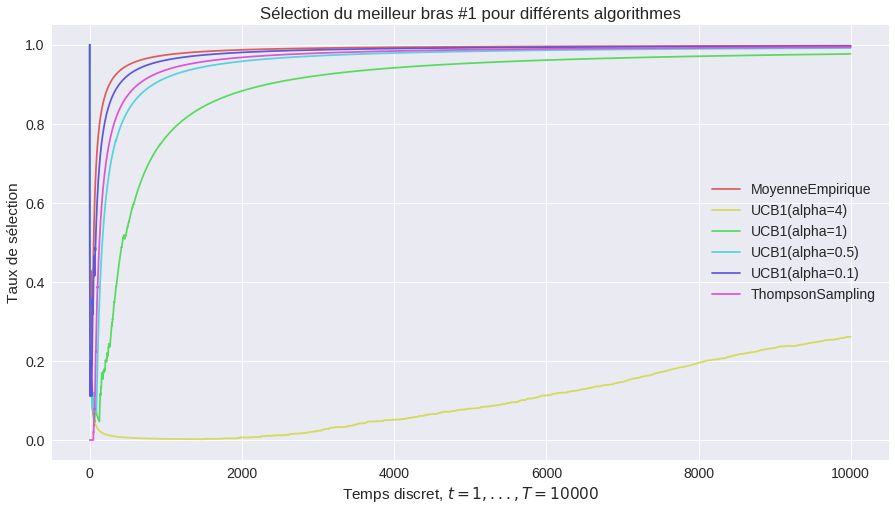

In [145]:
affiche_selections(choix, noms, kstar)

On commence à voir une différence de vitesse de convergence, pour l'identification du meilleur bras.

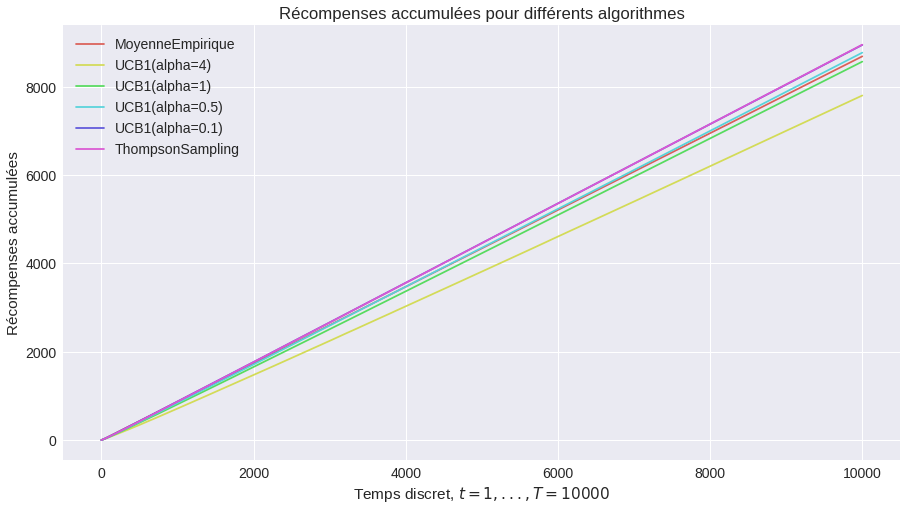

In [146]:
affiche_recompenses(recompenses, noms)

Difficile de différence quel algorithme est le plus efficace, même si clairement les plus grandes valeurs de $\alpha = 4, 1$ pour UCB semblent avoir moins bien fonctionner.

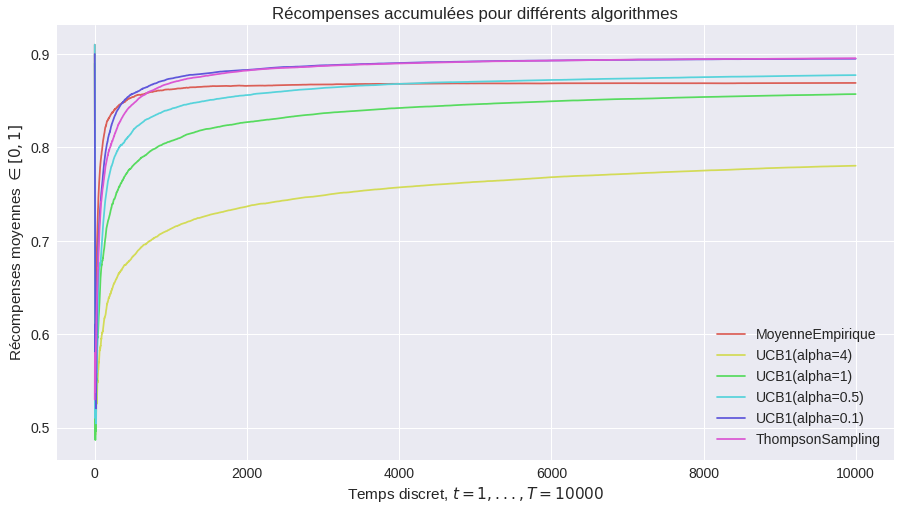

In [147]:
affiche_recompenses_moyennes(recompenses, noms)

En terme de récompenses moyennes au cours du temps, les 4 algorithmes les plus efficaces convergent vers $\mu^* = \mu_1 = 0.9$.

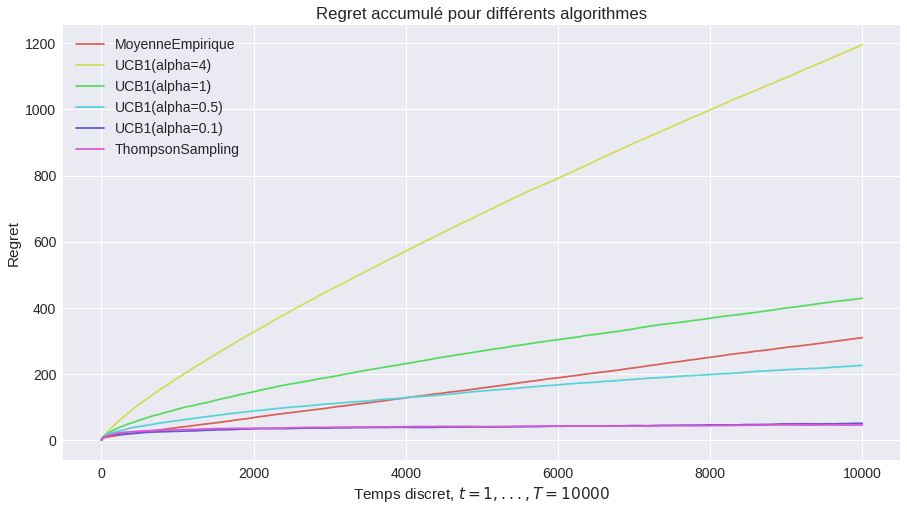

In [148]:
affiche_regret(recompenses, noms, mustar=mus[kstar])

Cette fois, ces 100 simulations permet de conclure quelques points :

- `MoyenneEmpirique` converge rapidement au début, mais son regret $\mathcal{R}(t)$ ne semble pas avoir un profil logarithmique (il faudrait essayer de plus grands horizons pour le confirmer),
- Les différents `UCB` semblent tous avoir un regret logarithmique, i.e., $\mathcal{R}(t) = \mathcal{O}(\log t)$, et plus le $\alpha$ est petit, plus le regret est bas,
- `ThompsonSampling` fonctionne très bien, sans avoir à choisir de constante $\alpha$.

### Dernier problème, simulé 1000 fois
On s'intéresse enfin à un problème bien plus difficile, simulé 1000 fois et sur un horizon plus long ($T = 10000$).

In [178]:
horizon = 10000
repetitions = 1000
mus = [0.3, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.02, 0.02, 0.02, 0.01, 0.01, 0.005, 0.005, 0.001, 0.001]
bras = [ Bernoulli(mu) for mu in mus ]
K = len(mus)
kstar = np.argmax(mus)

In [179]:
horizon, repetitions, mus, bras, K, kstar

(10000,
 1000,
 [0.3,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.02,
  0.02,
  0.02,
  0.01,
  0.01,
  0.005,
  0.005,
  0.001,
  0.001],
 16,
 0)

On va comparer différents choix de $\alpha$ pour l'algorithme UCB : $\alpha = 4, 1, 0.5, 0.1, 0.01, 0.001$.

In [180]:
algorithmes = [MoyenneEmpirique(K), UCB1(K, alpha=4), UCB1(K, alpha=1),
               UCB1(K, alpha=0.5), UCB1(K, alpha=0.1), UCB1(K, alpha=0.01),
               UCB1(K, alpha=0.001), ThompsonSampling(K)]
algorithmes

Pour les légendes, on a besoin des noms des algorithmes :

In [181]:
noms = ["MoyenneEmpirique", "UCB1(alpha=4)", "UCB1(alpha=1)",
        "UCB1(alpha=0.5)", "UCB1(alpha=0.1)", "UCB1(alpha=0.01)",
        "UCB1(alpha=0.001)", "ThompsonSampling"]

On peut commencer la simulation, pour chaque algorithme.

In [182]:
%%time
N = len(algorithmes)
recompenses, choix = np.zeros((N, horizon)), np.zeros((N, horizon))

# Pour chaque répétitions
for rep in tqdm(range(repetitions), desc="Répétitions"):
    for i, alg in enumerate(algorithmes):
        rec, ch = simulation(bras, alg, horizon)
        recompenses[i] += rec
        choix[i] += ch

# On moyenne
recompenses /= repetitions
choix /= repetitions

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide




CPU times: user 21min 7s, sys: 1min 11s, total: 22min 18s
Wall time: 21min 6s


Cette fois, les statistiques accumulées ne sont plus entières.

In [183]:
recompenses, choix

(array([[ 0.269,  0.043,  0.056, ...,  0.246,  0.241,  0.269],
        [ 0.277,  0.049,  0.038, ...,  0.122,  0.113,  0.126],
        [ 0.303,  0.051,  0.056, ...,  0.242,  0.238,  0.211],
        ..., 
        [ 0.306,  0.051,  0.041, ...,  0.308,  0.303,  0.305],
        [ 0.301,  0.058,  0.055, ...,  0.254,  0.248,  0.246],
        [ 0.047,  0.034,  0.036, ...,  0.316,  0.319,  0.315]]),
 array([[ 0.   ,  1.   ,  2.   , ...,  1.138,  1.138,  1.138],
        [ 0.   ,  1.   ,  2.   , ...,  4.932,  4.883,  5.153],
        [ 0.   ,  1.   ,  2.   , ...,  1.862,  1.741,  1.825],
        ..., 
        [ 0.   ,  1.   ,  2.   , ...,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  1.   ,  2.   , ...,  0.594,  0.596,  0.596],
        [ 7.543,  7.589,  7.706, ...,  0.041,  0.076,  0.057]]))

On affiche et vérifie les résultats attendus :

In [184]:
choix = np.floor(choix)

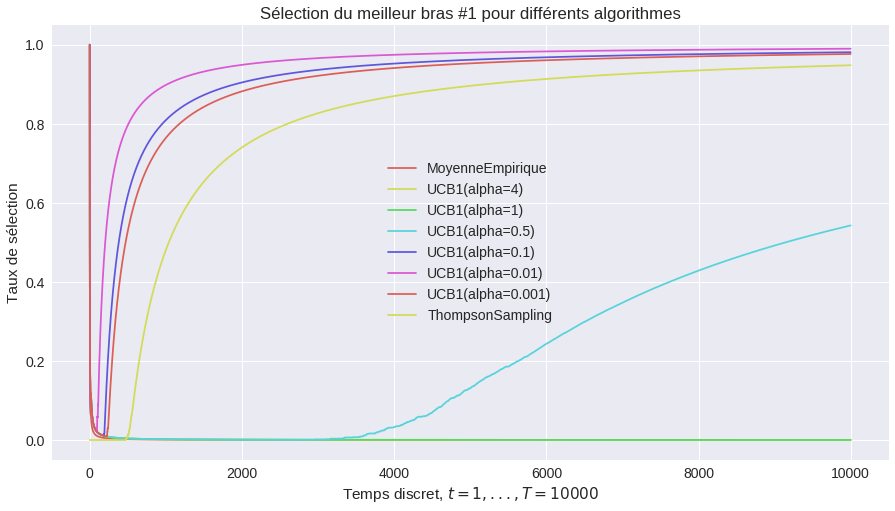

In [185]:
affiche_selections(choix, noms, kstar)

On commence à voir une différence de vitesse de convergence, pour l'identification du meilleur bras.

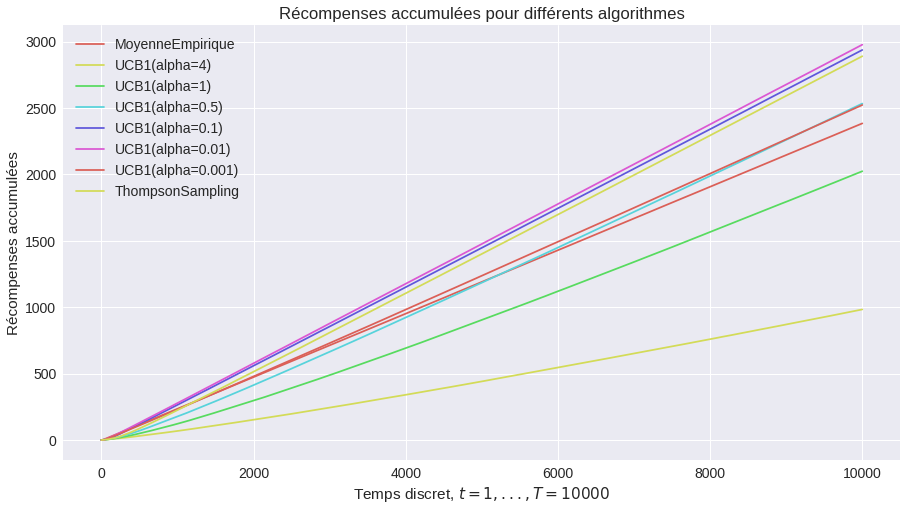

In [186]:
affiche_recompenses(recompenses, noms)

Difficile de différence quel algorithme est le plus efficace, même si clairement les plus grandes valeurs de $\alpha = 4, 1$ pour UCB semblent avoir moins bien fonctionner.

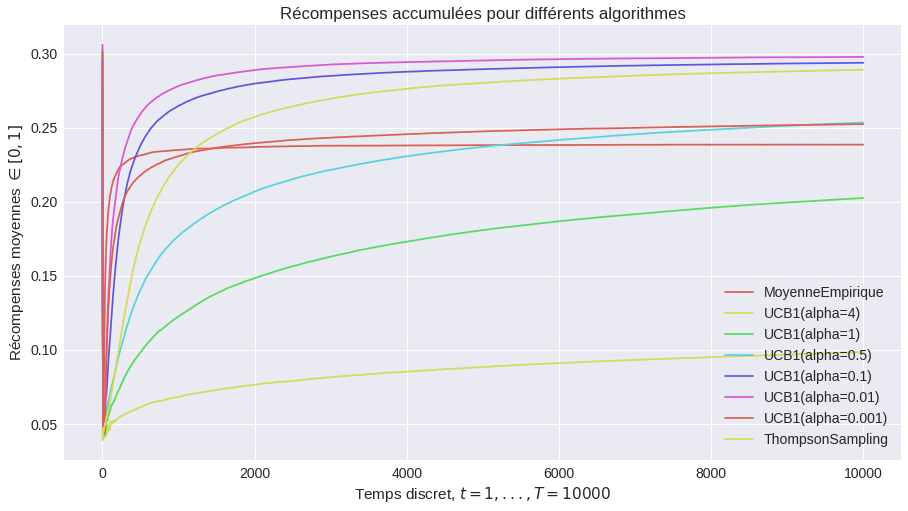

In [187]:
affiche_recompenses_moyennes(recompenses, noms)

En terme de récompenses moyennes au cours du temps, les 4 algorithmes les plus efficaces convergent vers $\mu^* = \mu_1 = 0.9$.

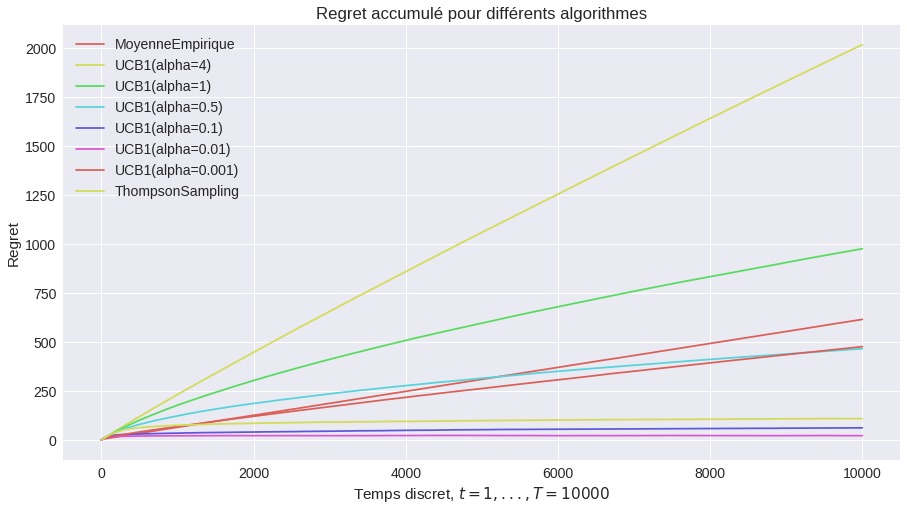

In [188]:
affiche_regret(recompenses, noms, mustar=mus[kstar])

Cette fois, ces 1000 simulations permet de renforcer les conclusions précédentes :

- `MoyenneEmpirique` converge rapidement au début, mais son regret $\mathcal{R}(t)$ ne semble pas avoir un profil logarithmique (il faudrait essayer de plus grands horizons pour le confirmer),
- Les différents `UCB1` semblent tous avoir un regret logarithmique, i.e., $\mathcal{R}(t) = \mathcal{O}(\log t)$, et plus le $\alpha$ est petit, plus le regret est bas,
- Mais si $\alpha$ est trop petit (e.g., $\alpha = 10^{-3}$), `UCB1(alpha)` n'est pas assez exploiteur, et pour ce problème à $K=15$ bras, il ne fonctionne plus bien,
- `ThompsonSampling` fonctionne très bien, sans avoir à choisir de constante $\alpha$.

----
## Conclusion
> Merci d'avoir lu jusqu'ici...

J'espère que ce petit document a pu vous aider à mieux comprendre les bases de la simulation et l'implémentation de problèmes et d'algorithmes de bandits.

J'ai adopté une approche très modulaire, pour chaque composant de la simulation (bras, algorithmes, fonctions de simulation, d'affichages etc).
C'est une façon de faire, bien-sûr ce n'est pas nécessaire, mais ça me semble clair, efficace et facile à lire et à compléter (si vous voulez rajouter un algorithme de plus).

> - Pour plus de détails, je recommande de lire en détails [ce petit article, datant de 2017, en français, écrit par Émilie Kaufmann](http://chercheurs.lille.inria.fr/ekaufman/Matapli_Kaufmann.pdf).
> - Cette petite simulation s'inspire de mon environnement plus lourd et plus complet, [AlgoBandits](http://banditslilian.gforge.inria.fr/).